<center>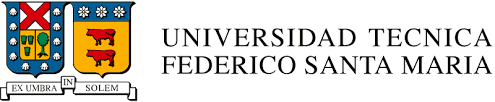</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477/577 Redes Neuronales Artificiales - 2022-2 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient
* Learn Rate Decay
* Optimizadores

# 1 - Redes Feed Forward para predicción de diabetes

De las redes neuronales artificiales más simples se encuentran las redes densas o Feed Forward, donde todas las neuronas de una capa estan conectadas a todos los inputs y envían su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más facil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta area del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del vanishing gradient y el exploding gradient, viendo también algunos optimizadores existentes.

Para realizar esto, utilizaremos una base de datos de variables médicas predictoras de la diabetes en mujeres y la variable objetivo (presencia o ausencia de diabetes), la cual se encuentra disponible en Kaggle, en la siguiente URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, el nivel de insulina, la edad, entre otros. Nuesta tarea durante esta pregunta será predecir si la persona tiene o no de diabetes a partir de algunas de las otras variables presentes en el dataset. Para esto primero deberán explorar los atributos del dataset, imputar los valores que falten o eliminarlos en caso que estime conveniente, y luego preprocesar los datos de forma eficiente para que así puedan ser utilizados por una red neuronal. Una vez separados los datos de entrenamiento, validación y test, procederemos a entrenar diferentes modelos, comparandolos y evaluando sus desempeños.

## 1.a Carga de datos y primeros análisis
Para cargar los datos, puede descargarlos desde el link de Kaggle, o puede descargarlos desde su jupyter nootebok como muestra el código a continuación. Para obtener más información acerca de como descargar datasets directamente desde la API de Kaggle puede dirigirse a la documentación que se encuentra en el siguiente link: https://github.com/Kaggle/kaggle-api#download-dataset-files. Para usar la API de Kaggle dentro de Google Colab puede serle de utilidad el siguiente link: https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2.

Luego de descomprimir el archivo descargado cargue los datos en un *Dataframe* como muestra el código. Explore superficialmente los datos utilizando los metodos .head, .describe o .info del *Dataframe*.

In [11]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Identifique y comente sobre las características de la variable objetivo (target) que sean relevantes para el problema. ¿Que puede decir acerca de la distribución de las clases?, ¿Están balanceadas? Explique usando gráficos que le parezcan pertinentes para representar el balance de clases. 

In [19]:
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [20]:
colnames = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in colnames:
    print(f"{col}: {len(df[df[col] == 0].axes[0])}")

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


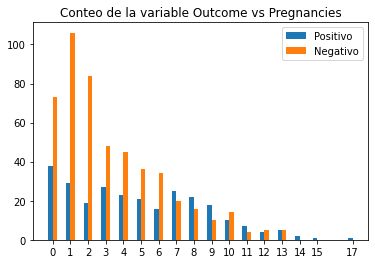

In [21]:
import matplotlib.pyplot as plt

pos_diab = df[df['Outcome'] != 0].groupby('Pregnancies').count()
neg_diab = df[df['Outcome'] == 0].groupby('Pregnancies').count()

pos_diab = pos_diab[['Outcome']]
neg_diab = neg_diab[['Outcome']]
width= 0.25

plt.title("Conteo de la variable Outcome vs Pregnancies")
plt.bar(pos_diab.index-width/2, pos_diab['Outcome'], width = width, label='Positivo')
plt.bar(neg_diab.index+width/2, neg_diab['Outcome'], width = width, label='Negativo')
plt.xticks(pos_diab.index, pos_diab.index)
plt.legend()
plt.show()

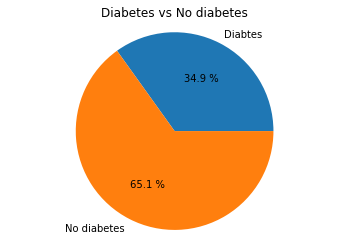

In [22]:
lista = [268, 500]
etiquetas = ["Diabtes", "No diabetes"]

plt.title("Diabetes vs No diabetes")
plt.pie(lista, labels=etiquetas, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

Con lo cual podemos concluir que los datos si están balanceados, pues tenemos una buena distribución de los datos en las diferentes clases.

¿Qué puede observar de los datos, tiene sentido que algunos valores de ciertas variables predictoras tengan valor 0? 

No tiene sentido que ciertas variables tomen valores igual a 0, comentaremos estos resultados posteriormente para cada variable de interes.

Identifique cuales son las columnas con datos faltantes que fueron imputadas con el valor 0. ¿Tiene sentido estos atributos tengan valores 0? Investigue el rango de valores que puede tomar cada atributo en el dataset, y comente sus principales características.

- Pregnancies: Número de embarazos de la mujer,
- Glucose: El nivel normal de glucosa en sangre es menor a 99 mg/dL, entre 100 y 125 mg/dL son niveles de prediabetes, mayores a esto son valores considerados diabetes. Niveles severamente bajos se consiera glucosa menor a 54 mg/dL, punto en el que una persona normal se desmayaría.
- BloodPressure: Presión arterial diastólica, valores menores a 80 mm Hg corresponde a niveles normales a elevados (contrastada con la presión sistlica), de 80 a 89 mm Hg son valores altos/hipertensión grado 1, mayores a 90 mm Hg son valores asociados a hipertensión grado 2 y mayores a 120 mm Hg corresponde a una crisis de hipertensión. Valores en el rango de 40 a 60 mm Hg se consideran bajos pero posibles, valores iguales a 0 solo son posibles en una persona muerta.
- SkinThickness: Grosor de pliegue tricipital, en general estos valores son mayores para mujeres que para hombres, y su rango típico es de 23.6 ± 7.5 mm.
- Insulin: niveles de insulina en sangre, es natural que este valor caiga en ayuno tengo su pico momentos después de la ingesta de alimentos, lo normal es no bajar de 3 mlU/L pero es posible.
- BMI: Indice de masa corporal, su calculo es Peso/(Altura)$^2$, es imposible que su valor sea 0 a menos que el mismo peso sea 0 o la altura de una persona sea infinito.
- DiabetesPedigreeFunction: Probabilidad de que una persona tenga diabetes en función del historial familiar de la misma enfermedad.
- Age: Edad de la mujer medida.

De las variables descritas, no tiene sentido que las variables 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' y 'BMI' tomen valores 0 por como están definidas, el resto de variables si tiene sentido que tomen valores nulos o ni siquiera tienen imputaciones de este tipo, por lo que estas últimas no requieren preprocesamiento.

## 1.b Train Test Split

En esta pregunta nos ocuparemos de separar el dataset en los conjuntos de entrenamiento, validación y test y estandarizar los datos. Para esto utilizaremos la librería sklearn, en particular la función `train_test_split`. Para esto separaremos primero el dataset en  $X$  e  $Y$. Luego separaremos los datos considerando un  70%  de ellos para entrenamiento, un  20%  para validación y un  10%  para test. ¿Qué estamos tratando de representar en esta separación en conjuntos de entrenamiento, validación y test?

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Outcome'])
y = df.drop(columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

X_tr, X_test, y_tr, y_test = train_test_split(
     X, y, test_size=0.1)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_tr, y_tr, test_size=0.2)

La partición de los datos de trabajo en los conjuntos de entrenamiento y test  diferenciados permite generar el modelo a partir de los datos de entrenamiento para después comprobar su eficiencia con los datos del conjunto de validación. 

## 1.c Valores faltantes e imputación

Tomando en cuenta solamente el conjunto de entrenamiento, considere los valores imputados con 0 que encontró en la pregunta 1.a y reemplacelos por `NaN`, para esto utilice el método `replace`. Cuente cuantos datos faltantes hay por cada atributo y grafíque. Cree 3 conjuntos de entrenamiento nuevos a partir del resultado de reemplazar con `NaN`:

1.   Conserve el conjunto de entrenamiento original intacto: $X_o$
2.   Reemplace los valores faltantes de cada columna por la media de estos: $X_1$
3.   Reemplace los valores faltantes de cada columna por la mediana de estos: $X_2$
4.   Reemplace los valores faltantes de cada columna utilizando el método MICE [1][2]: $X_3$

[1] https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.169.5745&rep=rep1&type=pdf

[2] https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=mice




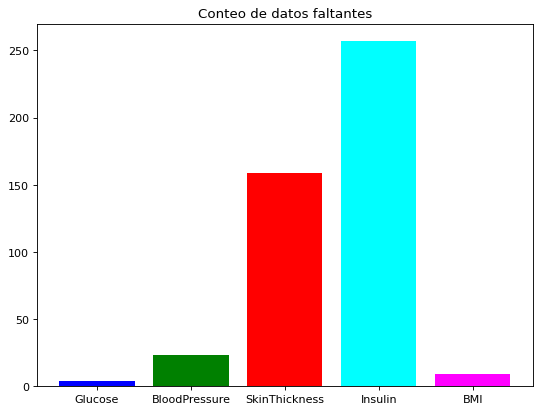

In [13]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_tr[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_tr[['Glucose',
    'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

X0 = X_tr.fillna(0)
X1 = X_tr.fillna(X_tr.mean())
X2 = X_tr.fillna(X_tr.median())

imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(X_tr)
X3 = pd.DataFrame(imputed, columns = X_tr.columns)

Cantidad_null = X_tr.drop(columns=['Pregnancies','DiabetesPedigreeFunction','Age']).isnull().sum()
plt.figure(figsize=(8,6),dpi=80)
plt.bar(Cantidad_null.index,
        Cantidad_null,
        color = ['blue', 'green', 'red', 'cyan', 'magenta'])

plt.title("Conteo de datos faltantes")
plt.show()

Como podemos ver tenemos bastantes valores inputados con 0s, los cuales no tienen sentido para estas variables (visto en la pregunta 1.a), por lo cual es importante hacer una imputación de datos.

Responda las siguientes preguntas:

*   ¿Qué es la imputación de datos?
Lidiar con los errores de omisión de mediciones en los datos, consiste en rellenar datos nulos (o 0 no apropiado en el contexto), de manera que la data tenga algún sentido "más real" respecto a la naturalidad de las variables.

*   ¿Cuáles son las ventajas y desventajas de los 3 métodos recién utilizados versus sin imputar ($X_o$)?
Existen ventajas claras de imputar datos en 0s que no tienen sentidos, dejar los 0 permite que el aprendizaje tome datos sin sentido y que cargan la distribución de cada variable hacia el 0, generando resultados inconsistentes y sesgados, imputar datos corrige este tipo de error. 

*   ¿Qué se necesita para ejecutar cada uno de los 3 métodos de imputación de datos? 
Para poder ejecutar cada uno de los 3 métodos de imputación de datos debemos de tener un dataframe que tenga `Nan` en los 0s señalados anteriormente. Para esto hacemos uso de la función `replace`, la cual nos permitirá remplazar los valores que queremos. 



*   ¿Qué puede decir de los conjuntos resultantes?¿Resuelven el problema de los datos faltantes?
Los conjuntos resultantes tendrán diferentes valores en los registros que antes contenian como registro "0" (media, mediana y metodo MICE) y para verificar que efectivamente se soluciono el problema de los datos faltantes, podemos imprimir esta información para cada conjunto nuevo.


Cantidad de 0s en X1:

In [25]:
colnames = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in colnames:
    print(f"{col}: {len(X1[X1[col] == 0].axes[0])}")

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


Cantidad de 0s en X2:

In [26]:
colnames = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in colnames:
    print(f"{col}: {len(X2[X2[col] == 0].axes[0])}")

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


Cantidad de 0s en X3:

In [27]:
colnames = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in colnames:
    print(f"{col}: {len(X2[X2[col] == 0].axes[0])}")

Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


Por lo tanto, si resuelven el problema de los valores faltantes.

## 1.d Estandarización

`Nota:` A menos que se indique explícitamente lo contrario, en esta y las siguientes preguntas realice los siguientes procedimientos y entrene las redes considerando como conjunto de entrenamiento cada $X \in \{X_o, X_1, X_2, X_3\}$ obtenido en la imputación anterior y comente las diferencias que observa en los desempeños de sus redes.

Ajuste los scalers con los datos de entrenamiento y transforme los datos para cada conjunto obtenido en la pregunta anterior.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler_x0 = StandardScaler()
scaler_x0.fit(X0)
x_tr_0 = scaler_x0.transform(X0)
x_val_0 = scaler_x0.transform(X_val)

scaler_x1 = StandardScaler()
scaler_x1.fit(X1)
x_tr_1 = scaler_x1.transform(X1)
x_val_1 = scaler_x1.transform(X_val)

scaler_x2 = StandardScaler()
scaler_x2.fit(X2)
x_tr_2 = scaler_x2.transform(X2)
x_val_2 = scaler_x2.transform(X_val)

scaler_x3 = StandardScaler()
scaler_x3.fit(X3)
x_tr_3 = scaler_x3.transform(X3)
x_val_3 = scaler_x3.transform(X_val)

- ¿Qué operación matemática realiza `StandarScaler` al momento de tranformar los datos? 
Se estandarizan las características eliminando la media y escalando a la varianza unitaria. La estarización estándar de una muestra $x$ se calcula como:

$$z = \frac{(x - u)}{s}$$

donde $u$ es la media de las muestras de entrenamiento o cero si `with_mean=False`, y $s$ es la desviación estándar de las muestras de entrenamiento o uno si `with_std=False`.


`fit:` Calcula la media y la desviación estándar (std) que se utilizarán para el escalado posterior.

`transform:` Realiza la estandarización mediante el centrado y el escalado.

- ¿Por qué debemos transformar los datos de validación y de test con el _scaler_ ajustado a los datos de entrenamiento? 
Pues si transfomamos los datos podremos mejorar la calidad de los datos de manera significativa y mejorar la eficiencia del proceso. Los datos transformados son más faciles de usar, confiables y compatibles con los sistemas y aplicaciones finales. 


## 1.e Primera Red
En esta pregunta construiremos y entrenaremos una primera red neuronal. Para esto utilizaremos la librería keras que se ocupa de crear, compilar y entrenar los modelos de manera simple. Keras se encargará por lo tanto de crear los modelos y al momento de compilarlos se instanciarán estos en una sesión de TensorFlow. 

Esta primera red será una red de una capa oculta con $256$ neuronas, activación ReLu. Para esta red y todas las demas utilizaremos la función de pérdida _Binary Cross Entropy_.
- ¿Porqué se ocupa esta función de pérdida?
Usamos la función de perdida Binary Cross Entropy pues estamos frente a un problema de calsificación binaria, es decir, tiene o no diabetes.
- ¿Qué función de activación se utiliza para la capa de salida en este tipo de problemas?
Para este tipo de problemas se usa la función de activación sigmoid en la capa de salida, pues, esta está relacionada con la distribución de Bernoulli, que nuevamente, es una distribución donde los posibles resultados del experimentes son binarios y justamente la variable que queremos predecir es binaria.
- ¿Cuántas neuronas para la capa de salida?
La cantidad de neuronas para la capa de salida es una, pues, por ejemplo, se podría hacer con dos neuronas (una que sea diabetes y otra que sea no diabetes) y cambiando la función de activación por una softmax, sin embargo, esta última opción sólo agrega redundancia, pues la sigmoid es una caso espacial de la softmax para un problema de clasificación binaria, y por lo tanto, habrá una neurona cuyo peso siempre será cero, en consecuencia, lo más adecuado para un problema de clasificación binaria es elegir una neurona junto con la función de activación sigmoid.

Para entrenar esta primera red utilizaremos Gradiente Descendente Estocástico con un _Learn Rate_ de 0.002. Finalmente entrenaremos esta red por unas 20 _epochs_.

Construya la red basandose en el siguiente código y en la documentación de keras. 

In [29]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras import Model
from keras.metrics import BinaryAccuracy

def createANN(learning_rate="0.002",activation="relu", hidden_act_reg=None, out_act_reg=None, neurons=256):
    inputs = Input(shape = (8, ))
    l1 = Dense(neurons, activation = activation, activity_regularizer=hidden_act_reg)(inputs)
    outputs = Dense(1, activation = "sigmoid", activity_regularizer=out_act_reg)(l1)

    ANN = Model(inputs = inputs, outputs = outputs)

    ANN.compile(
        optimizer=SGD(learning_rate), 
        loss='binary_crossentropy',metrics=[BinaryAccuracy()]
        )
    return ANN

In [30]:
ANN = createANN()

Utilice el método `.summary` para ver el número de parámetros de su red y los tamaños de cada capa. 

In [31]:
ANN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_7 (Dense)             (None, 256)               2304      
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


Explique el número de parámetros presentes en esta red, es decir: ¿Cómo a partir de la dimensión del _Input_ y el número de neuronas obtenemos ese número de parámetros? 

Considerando que estamos en una red fully connected, el número de parámetros son los pesos más los biases, por lo tanto, obtenemos que la cantidad de parámetros de la red es: 
$$(8 * 256 + 256) + (256 * 1 + 1) = 2 561,$$
es decir, se multiplica la cantidad neuronas de la capa $i$ con la cantidad de neuronas la capa $i+1$ y luego se suma la cantidad de neuronas de la capa $i+1$.

Entrene la red por 20 _epochs_, guardando el `history` que retorna el metodo `.fit`.

Grafique como varian los errores de validación y de entrenamiento a lo largo de las _epochs_. Comente.

In [32]:
def historyplot(history,title):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    return

def title(activation):
    titles = [f"{str(activation)} activation, no imputation",f"{str(activation)} activation, mean imputation",
          f"{str(activation)} activation, median imputation",f"{str(activation)} activation, iterative imputation"]
    return titles

def smartplot(history,titles):
    historyplot(history[0],titles[0])
    historyplot(history[1],titles[1])
    historyplot(history[2],titles[2])
    historyplot(history[3],titles[3])
    return

def trainANN(learning_rate=0.002,callbacks=None,activation="relu",epochs=20,hidden_act_reg=None,out_act_reg=None,neurons=256,create=createANN,plot=False):
    ANN = create(learning_rate,activation,hidden_act_reg,out_act_reg,neurons)
    history0 = ANN.fit(x_tr_0, y_tr, epochs=epochs, validation_data=(x_val_0,y_val),verbose=0,callbacks=callbacks)
    
    ANN = create(learning_rate,activation,hidden_act_reg,out_act_reg,neurons)
    history1 = ANN.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0,callbacks=callbacks)
    
    ANN = create(learning_rate,activation,hidden_act_reg,out_act_reg,neurons)
    history2 = ANN.fit(x_tr_2, y_tr, epochs=epochs, validation_data=(x_val_2,y_val),verbose=0,callbacks=callbacks)
    
    ANN = create(learning_rate,activation,hidden_act_reg,out_act_reg,neurons)
    history3 = ANN.fit(x_tr_3, y_tr, epochs=epochs, validation_data=(x_val_3,y_val),verbose=0,callbacks=callbacks)
    
    return history0,history1,history2,history3

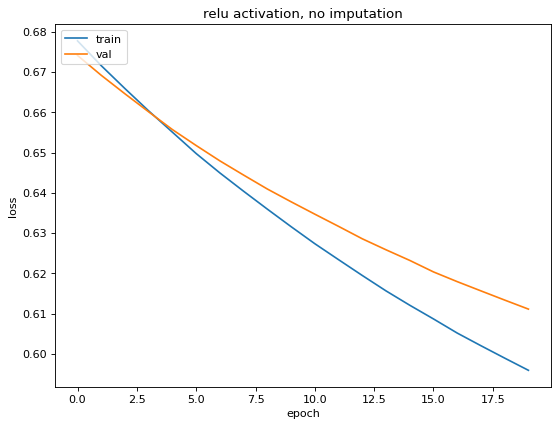

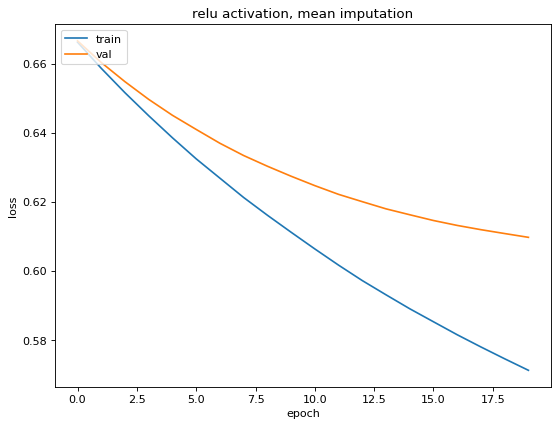

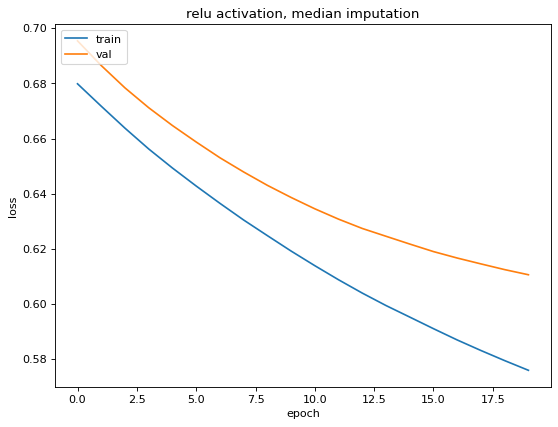

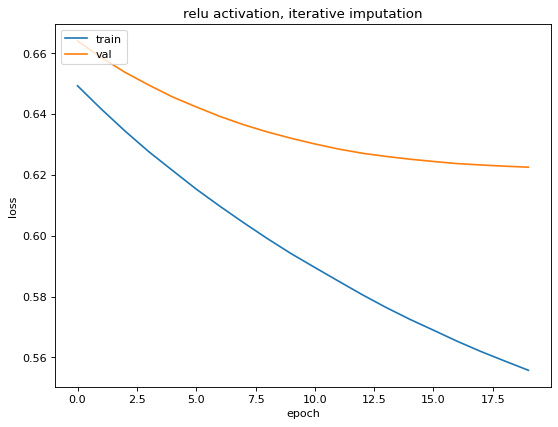

In [33]:
activation = "relu"
history = trainANN(plot=True)

smartplot(history,title(activation))

Cree y entrene nuevamente la red, esta vez cambiando el _learn rate_ utilizado para el SGD. Pruebe a lo menos un valor mayor y un valor menor al elegido anteriormente. Note que para valores mayores al propuesto puede comenzar a observar fenómeno de divergencia, por lo cual es recomendable agregarle a la red un _callback_, es decir una función que verifica estados y comportamientos de la red mientras se entrena, en particular `TerminateOnNaN`, el cual interrumpirá el proceso de entrenamiento si encuentra un valor NaN. 

Grafique el comportamiento de los errores de validación y entrenamiento y comente.

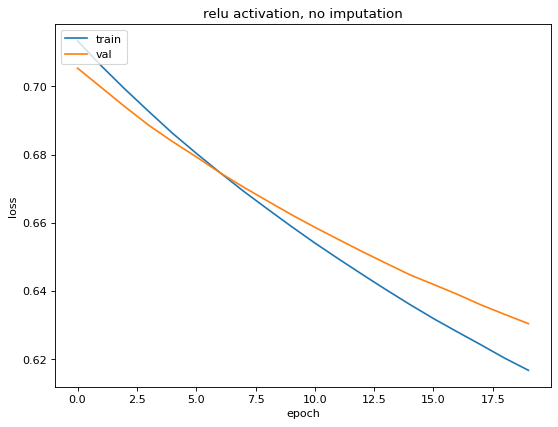

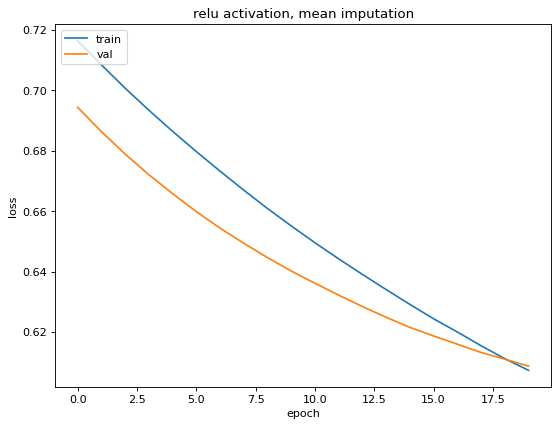

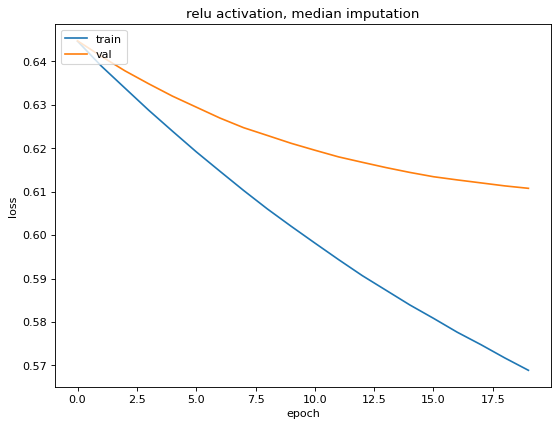

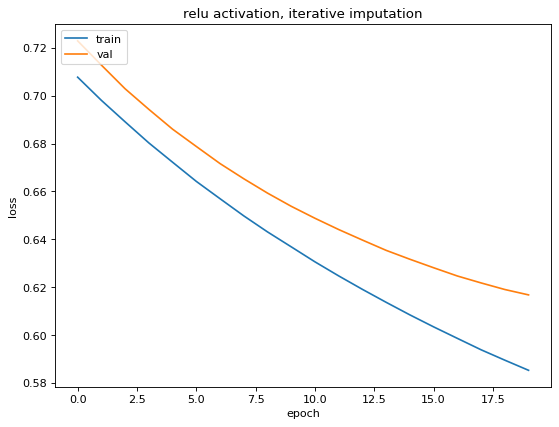

In [34]:
from keras.callbacks import TerminateOnNaN

learning_rate = 0.002
callbacks = [TerminateOnNaN()]

history = trainANN(learning_rate,callbacks,plot=True)
smartplot(history,title(activation))

Ahora lo mismo para un learning rate de 0.0001

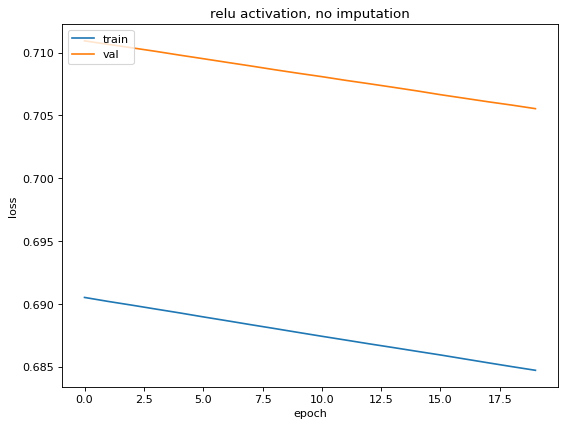

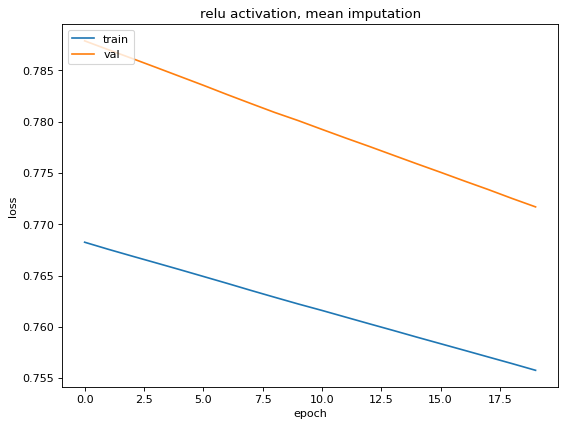

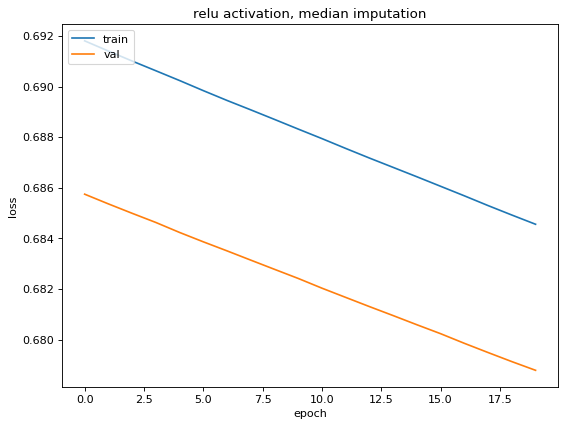

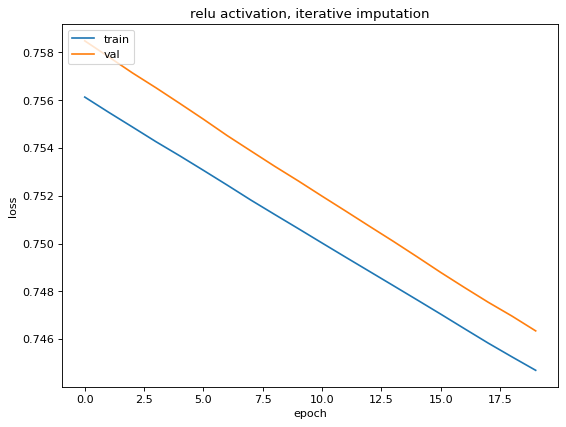

In [35]:
learning_rate=0.0001

history = trainANN(learning_rate,callbacks,plot=True)
smartplot(history,title(activation))

## 1.f Activación y regularizadores $l1$ $l2$
En esta pregunta se les propone explorar distintas funciones de activación y de regularización. En ambos casos debe entrenar la misma red entrenada anteriormente utilizando gradiente descendente estocástico con algun _learn rate_ que le parezca adecuado luego de la exploración en la pregunta anterior. 

* Para explorar distintas funciones de activación, cambie la activación de la capa oculta sucesivamente por: tangente hiperbólica, _Leaky ReLu_, sigmoidea y lineal. Para esto puede basarse en el código presentado abajo y la documentación de keras. Para la activación _Leaky ReLu_ pruebe cambiar el parámetro de la red. Describa sus resultados y si observa diferencias entre las redes. 


In [36]:
from keras.callbacks import EarlyStopping

In [37]:
def calcmax(history):
    val = dict()
    test = dict()
    valM = []
    ArgM = []
    testM = []
    for i in range(4):
        val[i] = history[i].history['val_binary_accuracy']
        test[i] = history[i].history['binary_accuracy']
        valM.append(max(val[i]))
        ArgM.append(np.argmax(val[i]))
        testM.append(test[i][ArgM[i]])
    return valM,ArgM,testM

def smallprint(history,titles):
    valM,ArgM,testM = calcmax(history)
    for i in range(4):
        print(f"{titles[i]}\nMax_val_acc = {valM[i]}, test_acc = {testM[i]}, epochs = {ArgM[i]}")

In [38]:
learning_rate=0.002
callbacks = [TerminateOnNaN(),EarlyStopping(patience=10)]
epochs=500

In [39]:
activation="tanh"

history = trainANN(learning_rate,callbacks,activation,epochs)

In [40]:
smallprint(history,title(activation))

tanh activation, no imputation
Max_val_acc = 0.7338129281997681, test_acc = 0.7699275612831116, epochs = 85
tanh activation, mean imputation
Max_val_acc = 0.7410072088241577, test_acc = 0.77173912525177, epochs = 70
tanh activation, median imputation
Max_val_acc = 0.7553957104682922, test_acc = 0.7681159377098083, epochs = 103
tanh activation, iterative imputation
Max_val_acc = 0.7194244861602783, test_acc = 0.7572463750839233, epochs = 27


In [41]:
activation="sigmoid"

history = trainANN(learning_rate,callbacks,activation,epochs)

In [42]:
smallprint(history,title(activation))

sigmoid activation, no imputation
Max_val_acc = 0.7338129281997681, test_acc = 0.7481883764266968, epochs = 245
sigmoid activation, mean imputation
Max_val_acc = 0.6978417038917542, test_acc = 0.7192028760910034, epochs = 130
sigmoid activation, median imputation
Max_val_acc = 0.6978417038917542, test_acc = 0.70652174949646, epochs = 115
sigmoid activation, iterative imputation
Max_val_acc = 0.6762589812278748, test_acc = 0.5833333134651184, epochs = 1


In [43]:
activation="linear"

history = trainANN(learning_rate,callbacks,activation,epochs)

KeyboardInterrupt: 

In [ ]:
smallprint(history,title(activation))

linear activation, no imputation
Max_val_acc = 0.798561155796051, test_acc = 0.7681159377098083, epochs = 97
linear activation, mean imputation
Max_val_acc = 0.7338129281997681, test_acc = 0.7663043737411499, epochs = 138
linear activation, median imputation
Max_val_acc = 0.7338129281997681, test_acc = 0.7626811861991882, epochs = 103
linear activation, iterative imputation
Max_val_acc = 0.769784152507782, test_acc = 0.7336956262588501, epochs = 9


In [ ]:
from keras.layers import LeakyReLU

In [ ]:
activation=LeakyReLU()
history = trainANN(learning_rate,callbacks,activation,epochs)

In [ ]:
smallprint(history,title('LeakyReLU'))

LeakyReLU activation, no imputation
Max_val_acc = 0.7913669347763062, test_acc = 0.7663043737411499, epochs = 114
LeakyReLU activation, mean imputation
Max_val_acc = 0.798561155796051, test_acc = 0.7355072498321533, epochs = 8
LeakyReLU activation, median imputation
Max_val_acc = 0.6978417038917542, test_acc = 0.7554348111152649, epochs = 44
LeakyReLU activation, iterative imputation
Max_val_acc = 0.7050359845161438, test_acc = 0.7572463750839233, epochs = 32


In [ ]:
activation=LeakyReLU(alpha=0.05)
history = trainANN(learning_rate,callbacks,activation,epochs)

In [ ]:
smallprint(history,title('LeakyReLU, alpha=0.05'))

LeakyReLU, alpha=0.05 activation, no imputation
Max_val_acc = 0.8057553768157959, test_acc = 0.75, epochs = 69
LeakyReLU, alpha=0.05 activation, mean imputation
Max_val_acc = 0.7410072088241577, test_acc = 0.7699275612831116, epochs = 57
LeakyReLU, alpha=0.05 activation, median imputation
Max_val_acc = 0.7194244861602783, test_acc = 0.739130437374115, epochs = 14
LeakyReLU, alpha=0.05 activation, iterative imputation
Max_val_acc = 0.6762589812278748, test_acc = 0.7518116235733032, epochs = 45


In [ ]:
activation=LeakyReLU(alpha=0.5)
history = trainANN(learning_rate,callbacks,activation,epochs)

In [ ]:
smallprint(history,title('LeakyReLU, alpha=0.5'))

LeakyReLU, alpha=0.5 activation, no imputation
Max_val_acc = 0.8057553768157959, test_acc = 0.7663043737411499, epochs = 148
LeakyReLU, alpha=0.5 activation, mean imputation
Max_val_acc = 0.7769784331321716, test_acc = 0.7409420013427734, epochs = 21
LeakyReLU, alpha=0.5 activation, median imputation
Max_val_acc = 0.7194244861602783, test_acc = 0.7572463750839233, epochs = 37
LeakyReLU, alpha=0.5 activation, iterative imputation
Max_val_acc = 0.6978417038917542, test_acc = 0.7536231875419617, epochs = 20


* Seleccione la función de activación que mejor resultados le dió y agregue regularización $l1$ a la capa oculta, luego pruebe con $l2$. Pruebe cambiar la tasa de regularización, reportando sus resultados. ¿Qué ocurre si la regularización es muy alta o muy baja? Una vez satisfecho con una tasa de regularización, aplique la regularización a la capa de salida y luego a ambas capas. 

Comparando el máximo valor de binary accuracy de las redes entrenadas en este inciso, se selecciona la función de activación tangente hiperbólica para lo siguiente.

In [ ]:
from keras.regularizers import l1,l2

def tinyprint(history):
    valM,ArgM,testM = calcmax(history)
    for i in range(4):
        print(f"X{i}: Max_val_acc = {valM[i]}, test_acc = {testM[i]}, epochs = {ArgM[i]}")

In [ ]:
activation = "tanh"
epochs = 100
tasa = [0.5,0.2,0.1,0.01,0.001,0.0001]
for t in tasa:
    print(f"L1 Regularization rate = {t}")
    hidden_act_reg = l1(t)
    history = trainANN(learning_rate,callbacks,activation,epochs,hidden_act_reg)
    tinyprint(history)

L1 Regularization rate = 0.5
X0: Max_val_acc = 0.7338129281997681, test_acc = 0.717391312122345, epochs = 6
X1: Max_val_acc = 0.7194244861602783, test_acc = 0.7300724387168884, epochs = 10
X2: Max_val_acc = 0.8057553768157959, test_acc = 0.7644927501678467, epochs = 15
X3: Max_val_acc = 0.6690647602081299, test_acc = 0.6702898740768433, epochs = 2
L1 Regularization rate = 0.2
X0: Max_val_acc = 0.7841726541519165, test_acc = 0.7481883764266968, epochs = 17
X1: Max_val_acc = 0.6906474828720093, test_acc = 0.7644927501678467, epochs = 29
X2: Max_val_acc = 0.6978417038917542, test_acc = 0.77173912525177, epochs = 21
X3: Max_val_acc = 0.6402877569198608, test_acc = 0.7427536249160767, epochs = 13
L1 Regularization rate = 0.1
X0: Max_val_acc = 0.7841726541519165, test_acc = 0.760869562625885, epochs = 36
X1: Max_val_acc = 0.7410072088241577, test_acc = 0.7210144996643066, epochs = 9
X2: Max_val_acc = 0.7338129281997681, test_acc = 0.7626811861991882, epochs = 38
X3: Max_val_acc = 0.784172654

In [ ]:
for t in tasa:
    print(f"L2 Regularization rate = {t}")
    act_hidden_reg = l2(t)
    history = trainANN(learning_rate,callbacks,activation,epochs,hidden_act_reg)
    tinyprint(history)

Se selcciona regularización L1 con tasa 0.001, aplicaremos esta regularización a la capa de salida.

In [ ]:
print(f"L1 Regularization rate = 0.001")
out_act_reg = l1(0.001)
history = trainANN(learning_rate,callbacks,activation,epochs,None,out_act_reg)
tinyprint(history)

Ahora aplicamos la regularización seleccionada para la capa oculta y la de salida.

In [ ]:
print(f"L1 Regularization rate = 0.001")
hidden_act_reg = l1(0.001)
out_act_reg = l1(0.001)
history = trainANN(learning_rate,callbacks,activation,epochs,hidden_act_reg,out_act_reg)
tinyprint(history)


¿Para qué se usan activaciones no lineales? ¿Le parece buena opción la activación sigmoidea para la capa oculta?

¿Cual es la intención de la regularización en general? En particular, ¿Que restricción implicita imponen las regularizaciones $l$1 o $l$2 sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones.

## 1.g Exploración del Número de neuronas

Ahora probaremos cambiando el número de neuronas en la capa oculta. Para esto, entrene la red con los hiperparámetros que estimen conveniente luego de la pregunta anterior, variando el numero de neuronas. Deben explorar a lo menos 10 número de neuronas distintos. Una recomendación sería por ejemplo explorar numero de neuronas en potencias de 2. 

Para cada red entrenada, recuperen el mejor error de validación y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validación. Grafique como se comportan ambos errores a medida crece el número de neuronas y comente. 

In [ ]:
def calcmin(history):
    val = dict()
    test = dict()
    valM = []
    ArgM = []
    testM = []
    for i in range(4):
        val[i] = history[i].history['val_loss']
        test[i] = history[i].history['loss']
        valM.append(min(val[i]))
        ArgM.append(np.argmin(val[i]))
        testM.append(test[i][ArgM[i]])
    return valM,ArgM,testM


def tinyprint2(history):
    valM,ArgM,testM = calcmin(history)
    for i in range(4):
        print(f"X{i}: Min_val_loss = {valM[i]}, test_loss = {testM[i]}, epochs = {ArgM[i]}")

In [ ]:
learning_rate = 0.002
callbacks = [TerminateOnNaN(),EarlyStopping(patience=10)]
activation = 'tanh'
epochs=300
hidden_act_reg = l1(0.001)
out_act_reg = l1(0.001)

In [ ]:
idx = []
validation = []
test = []
for i in range(10):
    neurons = 2**(i+1)
    print(f"Neurons = {neurons}")
    history = trainANN(learning_rate,callbacks,activation,epochs,hidden_act_reg,out_act_reg,neurons)
    valM,ArgM,testM = calcmin(history)
    idx.append(neurons)
    validation.append(valM)
    test.append(testM)
    tinyprint2(history)

Neurons = 2
X0: Min_val_loss = 0.5640700459480286, test_loss = 0.5835970044136047, epochs = 299
X1: Min_val_loss = 0.5936176776885986, test_loss = 0.5665591955184937, epochs = 299
X2: Min_val_loss = 0.5279281735420227, test_loss = 0.5076541900634766, epochs = 299
X3: Min_val_loss = 0.5468323230743408, test_loss = 0.5163991451263428, epochs = 299
Neurons = 4
X0: Min_val_loss = 0.4736771583557129, test_loss = 0.48688945174217224, epochs = 299
X1: Min_val_loss = 0.49679434299468994, test_loss = 0.490547239780426, epochs = 299
X2: Min_val_loss = 0.5068301558494568, test_loss = 0.48777103424072266, epochs = 299
X3: Min_val_loss = 0.46157222986221313, test_loss = 0.4873698651790619, epochs = 299
Neurons = 8
X0: Min_val_loss = 0.46673187613487244, test_loss = 0.48332783579826355, epochs = 299
X1: Min_val_loss = 0.4606938064098358, test_loss = 0.47154003381729126, epochs = 299
X2: Min_val_loss = 0.5091798305511475, test_loss = 0.49089574813842773, epochs = 299
X3: Min_val_loss = 0.483510196208

In [ ]:
[i[0] for i in validation]

[0.5640700459480286,
 0.4736771583557129,
 0.46673187613487244,
 0.46534591913223267,
 0.4639075994491577,
 0.4730372130870819,
 0.4812811017036438,
 0.4951963424682617,
 0.5191730260848999,
 0.5448771119117737]

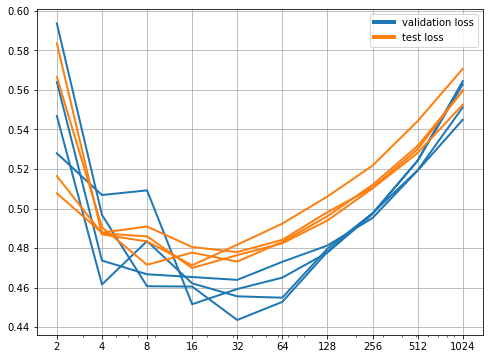

In [ ]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C0', lw=4),
                Line2D([0], [0], color='C1', lw=4)]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(idx, validation,color='C0', label="validation loss", lw=2)
ax.plot(idx, test,color='C1', label="test loss", lw=2)
ax.grid()
ax.set_xscale('log')
ax.legend(custom_lines,['validation loss','test loss'])
plt.xticks(idx,idx)
plt.show()


## 1.h Dropout
Como seguramente constataron en la pregunta anterior, un numero demasiado grande de parámetros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximación a este fenómeno que ha dado excelente resultado en redes neuronales es el método _dropout_, donde estocásticamente se desactivan una fracción de las neuronas al momento del entrenamiento, así efectivamente reduciendo el tamaño del modelo que se entrena en cada iteración e implicitamente obteniendo modelos más robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

Según lo aprendido en el ramo, ¿en qué consiste el fenómeno de _overfitting_? ¿Por qué modelos más grandes suelen presentar el fenómeno? 

Entrene la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con parámetro $0.5$ inmediatamente luego de la capa oculta. Repita luego el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ hará que la red entrene más lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 

¿Qué observa al agregar _dropout_? Comente y compare con sus resultados anteriores. 

Este fenómeno consiste en que el modelo está muy bien entrenado para hacer predicciones, pero, sólo de la data que conoce, es decir, del conjunto de entrenamiento, en consecuencia, si le pasamos datos con el cual no ha sido entranado, o en otras palabras, no conoce, entonces, la predicción que hará será considerablemente peor que la que haría sobre data que sí conoce. Los modelos más grandes suelen presentar este fenómeno pues tienen más chaces (al tener más parametros) de ajustarse muy bien a la data que se le está suministrando. Ejemplo, si tenemos 50 libros y una estanteria con 50 espacios disponibles, la red sólo va a aprender que un libro va a ir al espacio disponible, en cambio, si le pasamos una estanteria con menos espacio, la red tendrá que "aprender" el concepto de gestionar el espacio, y por ejemplo, poner los libros faltantes de forma diagonal, horizotal o uno sobre otro, es decir, en este último caso, la red es capaz de ''aprender'' un concepto y que puede ocupar en casos de que el número de libros y espacios no coincida.

In [ ]:
from keras.layers import Dropout

def dropoutANN(learning_rate,activation, hidden_act_reg, out_act_reg, neurons):
    inputs = Input(shape = (8, ))
    l1 = Dense(neurons, activation = activation, activity_regularizer=hidden_act_reg)(inputs)
    l2 = Dropout(.5)(l1)
    outputs = Dense(1, activation = "sigmoid", activity_regularizer=out_act_reg)(l2)

    ANN = Model(inputs = inputs, outputs = outputs)

    ANN.compile(
        optimizer=SGD(learning_rate), 
        loss='binary_crossentropy',metrics=[BinaryAccuracy()]
        )
    return ANN

In [ ]:
learning_rate = 0.002
callbacks = [TerminateOnNaN(),EarlyStopping(patience=10)]
activation = 'tanh'
epochs=1000
hidden_act_reg = l1(0.001)
out_act_reg = l1(0.001)
neurons = 16

In [ ]:
history = trainANN(learning_rate,callbacks,activation,epochs,hidden_act_reg,out_act_reg,neurons)

In [ ]:
tinyprint(history)
tinyprint2(history)

X0: Max_val_acc = 0.798561155796051, test_acc = 0.7481883764266968, epochs = 59
X1: Max_val_acc = 0.8273381590843201, test_acc = 0.7644927501678467, epochs = 233
X2: Max_val_acc = 0.8273381590843201, test_acc = 0.7536231875419617, epochs = 251
X3: Max_val_acc = 0.8201438784599304, test_acc = 0.7663043737411499, epochs = 896
X0: Min_val_loss = 0.45191487669944763, test_loss = 0.47386303544044495, epochs = 410
X1: Min_val_loss = 0.4369456470012665, test_loss = 0.4709751307964325, epochs = 248
X2: Min_val_loss = 0.4428294599056244, test_loss = 0.4664243161678314, epochs = 638
X3: Min_val_loss = 0.4377487003803253, test_loss = 0.45719730854034424, epochs = 962


In [ ]:
neurons = 32
history = trainANN(learning_rate,callbacks,activation,epochs,hidden_act_reg,out_act_reg,neurons)

In [ ]:
tinyprint(history)
tinyprint2(history)

X0: Max_val_acc = 0.8057553768157959, test_acc = 0.7264492511749268, epochs = 6
X1: Max_val_acc = 0.8201438784599304, test_acc = 0.7663043737411499, epochs = 405
X2: Max_val_acc = 0.8345323801040649, test_acc = 0.7572463750839233, epochs = 191
X3: Max_val_acc = 0.8273381590843201, test_acc = 0.77173912525177, epochs = 681
X0: Min_val_loss = 0.46062761545181274, test_loss = 0.48197880387306213, epochs = 224
X1: Min_val_loss = 0.44363969564437866, test_loss = 0.47229185700416565, epochs = 577
X2: Min_val_loss = 0.4540017247200012, test_loss = 0.47419291734695435, epochs = 332
X3: Min_val_loss = 0.440752774477005, test_loss = 0.4683590233325958, epochs = 671


## 1.i Learning Rate Decay
Ahora entrenaremos un modelo manejando manualmente el _learn rate_. Para esto utilizaremos el _callback_ `LearningRateScheduler`. Este _callback_ nos permitirá implementar una función que maneje el _learn rate_ de nuestro modelo. 

Escriba una función que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La función debe dividir por 2 el lr cada 10 _epochs_. Además ponga como restricción que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la función retorna  $5\times 10^{-5}$.

Entrene su red preferida de las preguntas anteriores con esta modificación, grafique los errores a lo largo del entrenamiento y comente. Según lo visto en el ramo, ¿por qué podría ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red?

In [ ]:
from keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch):
    lr = initial_lr * math.pow(0.5,math.floor((1+epoch)/10))
    if lr <= 5e-5:
        return 5e-5
    else:
        return lr

schedule = LearningRateScheduler(step_decay)

In [ ]:
initial_lr = 0.01
callbacks = [TerminateOnNaN(),schedule]
activation = 'tanh'
epochs=500
hidden_act_reg = l1(0.001)
out_act_reg = l1(0.001)
neurons = 32

In [ ]:
history = trainANN(learning_rate,callbacks,activation,epochs,hidden_act_reg,out_act_reg,neurons)

In [ ]:
tinyprint(history)
tinyprint2(history)

X0: Max_val_acc = 0.769784152507782, test_acc = 0.7463768124580383, epochs = 42
X1: Max_val_acc = 0.769784152507782, test_acc = 0.7572463750839233, epochs = 188
X2: Max_val_acc = 0.7913669347763062, test_acc = 0.7572463750839233, epochs = 46
X3: Max_val_acc = 0.7769784331321716, test_acc = 0.7445651888847351, epochs = 14
X0: Min_val_loss = 0.48195791244506836, test_loss = 0.5116596817970276, epochs = 499
X1: Min_val_loss = 0.49204161763191223, test_loss = 0.4970357120037079, epochs = 499
X2: Min_val_loss = 0.47067585587501526, test_loss = 0.4867710769176483, epochs = 499
X3: Min_val_loss = 0.4791572093963623, test_loss = 0.49233880639076233, epochs = 499


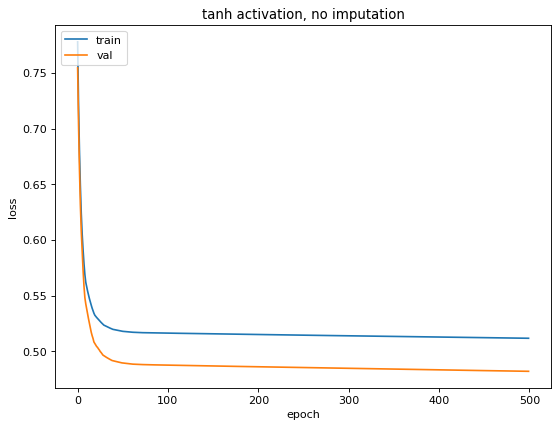

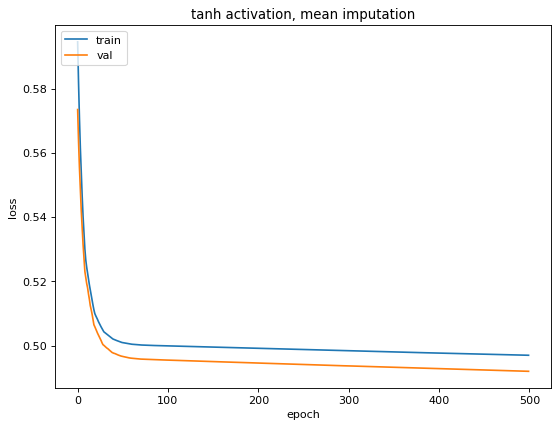

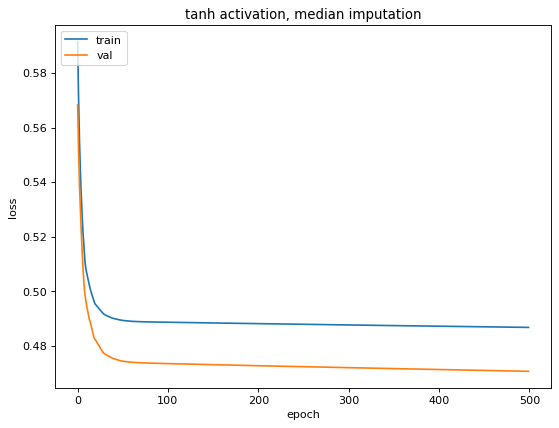

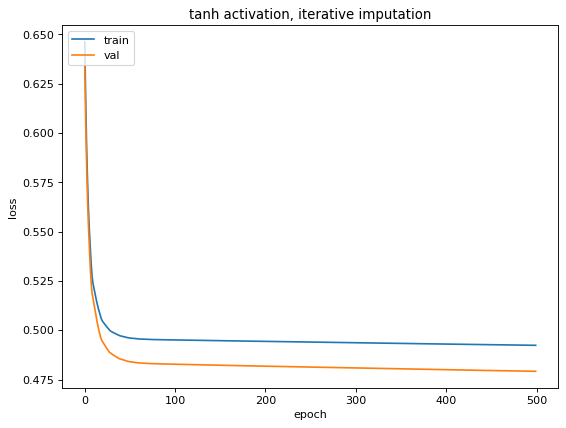

In [ ]:
smartplot(history,title(activation))

## 1.j Vanishing Gradient

`Nota:` para esta y las siguientes preguntas solo considere el mejor conjunto de entrenamiento obtenidos a partir de la imputación, es decir, escoja el $X \in \{X_1, X_2, X_3\}$ con el que mejores resultados haya obtenido hasta ahora.

El fenómeno del _vanishing gradient_ es el rápido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de la tarea solo hemos entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximación universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

En esta pregunta entrenaremos una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en día sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto construya una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: $256$ $256$ $128$ $128$ $32$ y $32$, o con valores similares. De tal manera obtendrá un valor de parámetros relativamente comparable a los valores utilizados en las primeras redes. 

Grafique un histograma con los pesos de las 6 capas densas de la red sin entrenar, entrenela a completitud con el método que estime conveniente y luego grafique nuevamente los histogramas para las 6 capas. Comente lo que observa. 

Luego, pruebe cambiar la inizialización de los pesos de la capa densa, puede revisar la documentación de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. ¿Se logra solucionar el problema? 

Por último, pruebe aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. ¿Qué observa en este caso? 

In [ ]:
initial_lr = 0.002
activation = 'tanh'
epochs=700
hidden_act_reg = l1(0.001)
out_act_reg = l1(0.001)

In [ ]:
def weightANN(kernel_i="GlorotUniform"):
    ANN = Sequential()
    ANN.add(Input(shape=(8,)))
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(1, activation = "sigmoid", activity_regularizer=out_act_reg))
    ANN.compile(
            optimizer=SGD(initial_lr), 
            loss='binary_crossentropy',metrics=[BinaryAccuracy()]
            )
    return ANN

def plotweights(ANN,bias=False):
    figure1, axis1 = plt.subplots(3, 2, figsize=(13,10))
    if bias:
        figure2, axis2 = plt.subplots(3, 2, figsize=(13,10))
    k = 0
    for i in range(3):
        for j in range(2):
            layer_kernel_weights = ANN.get_layer(index=k).get_weights()[0].flatten().tolist()
            axis1[i, j].hist(layer_kernel_weights, bins = 100, color = "red", alpha = 0.7)
            axis1[i, j].set_title(f"Weights histogram layer {k+1}")
            if bias:
                layer_bias_weight = ANN.get_layer(index=k).get_weights()[1].flatten().tolist()
                axis2[i, j].hist(layer_bias_weight, bins = 100, color = "blue", alpha = 0.7)
                axis2[i, j].set_title(f"Weights histogram layer {k+1}")
            k+=1
    plt.show()

In [ ]:
ANN = weightANN()

In [ ]:
ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_290 (Dense)           (None, 256)               2304      
                                                                 
 dense_291 (Dense)           (None, 256)               65792     
                                                                 
 dense_292 (Dense)           (None, 128)               32896     
                                                                 
 dense_293 (Dense)           (None, 128)               16512     
                                                                 
 dense_294 (Dense)           (None, 32)                4128      
                                                                 
 dense_295 (Dense)           (None, 32)                1056      
                                                                 
 dense_296 (Dense)           (None, 1)                 3

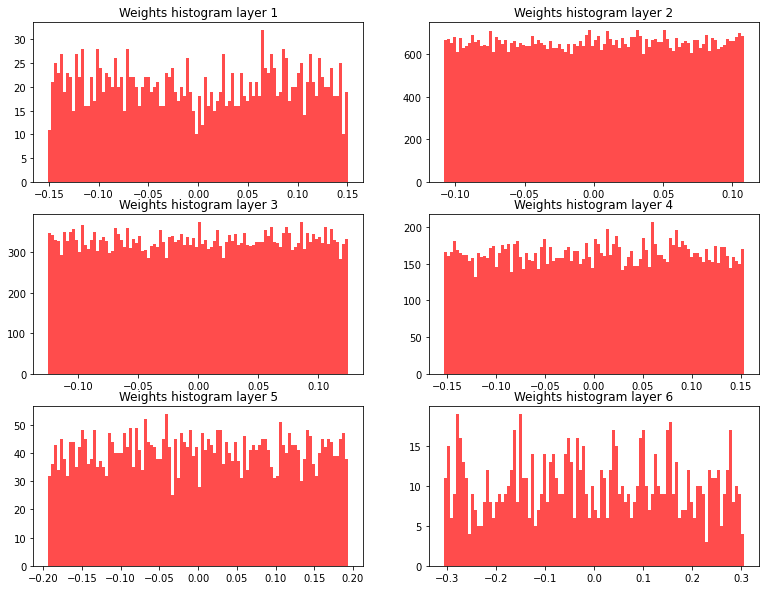

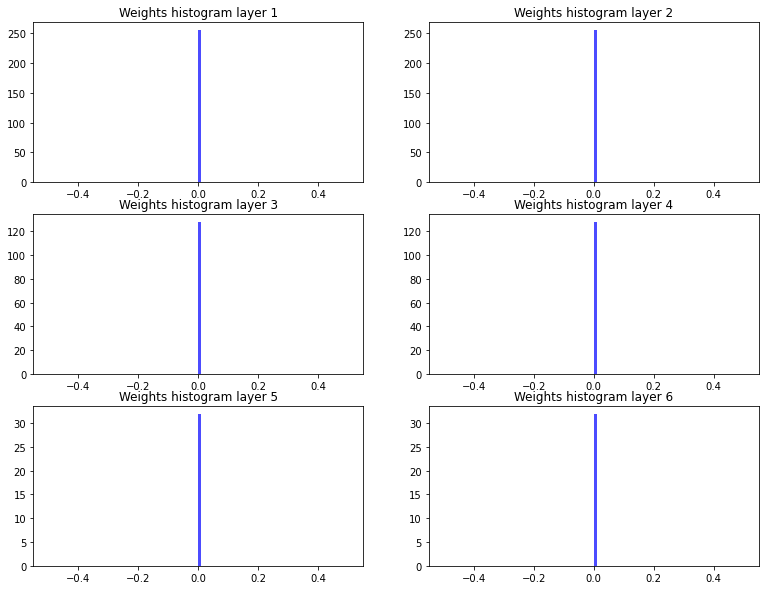

In [ ]:
plotweights(ANN,bias=True)

In [ ]:
history = ANN.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)

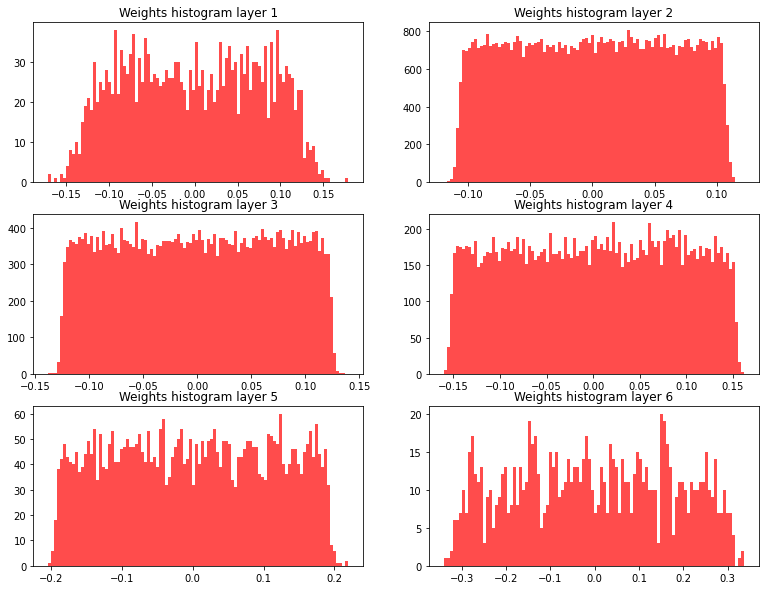

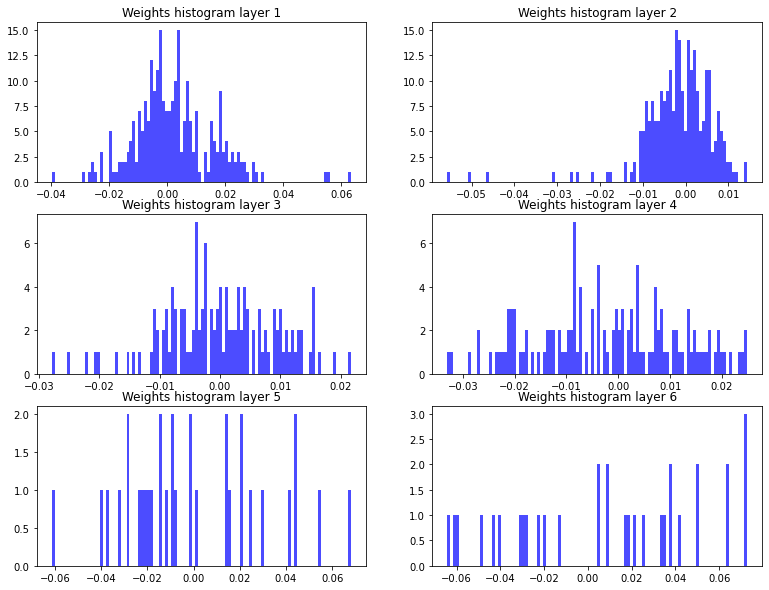

In [ ]:
plotweights(ANN,bias=True)

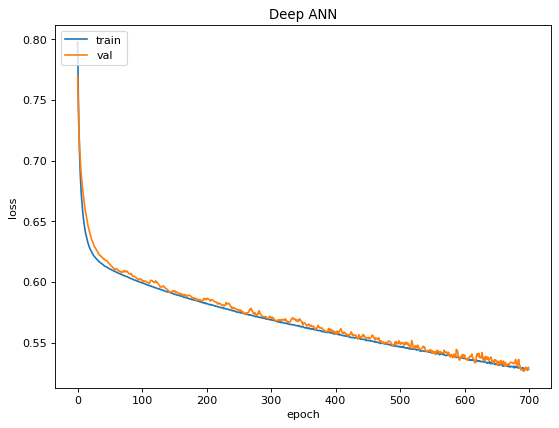

In [ ]:
historyplot(history,"Deep ANN")

In [ ]:
ANNnormal = weightANN('random_normal')

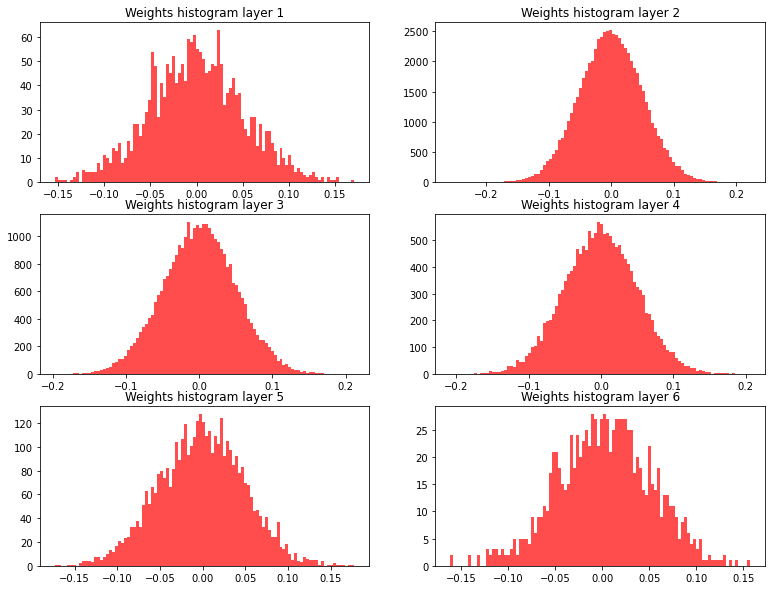

In [ ]:
plotweights(ANNnormal)

Repetiremos el procedimiento considerando una inicialización de pesos normal

In [ ]:
history = ANNnormal.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)

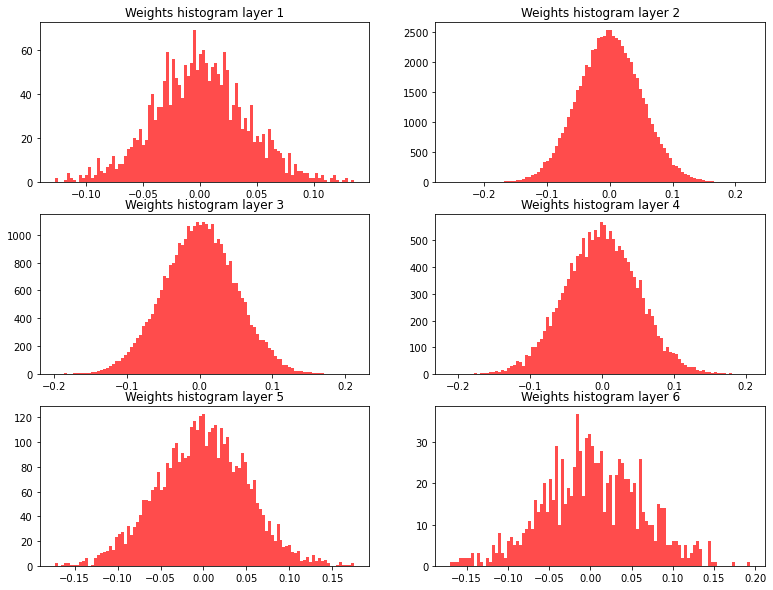

In [ ]:
plotweights(ANNnormal)

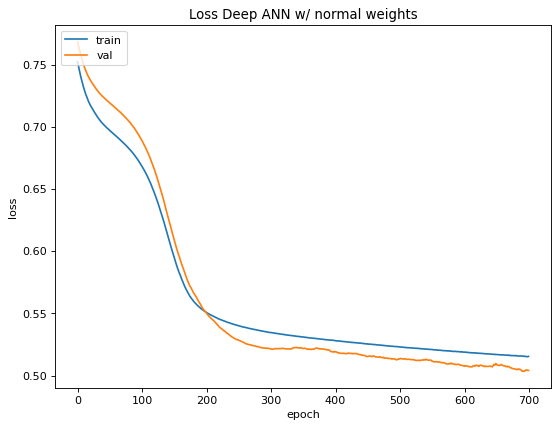

In [ ]:
historyplot(history,"Loss Deep ANN w/ normal weights")

Realizaremos el mismo procedimiento para una inicialización de pesos Glorot Normal.

In [ ]:
ANNGlorotNormal = weightANN("GlorotNormal")

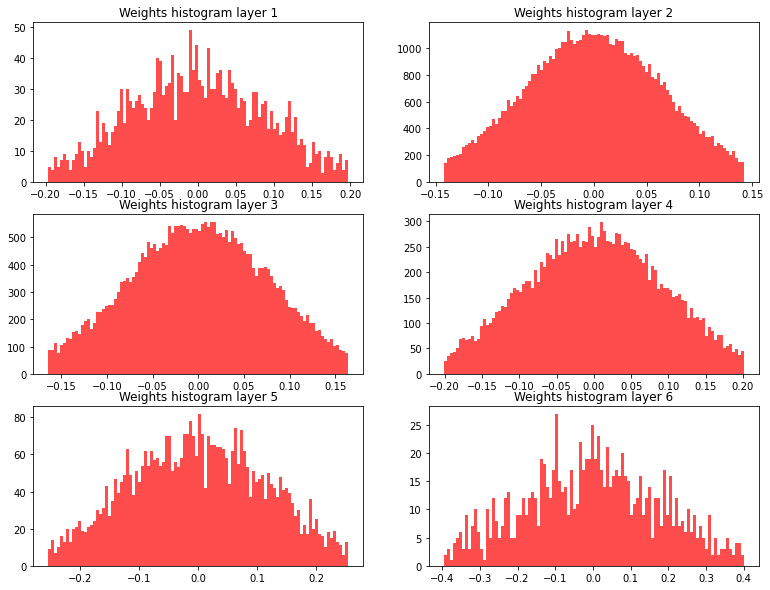

In [ ]:
plotweights(ANNGlorotNormal)

In [ ]:
history = ANNGlorotNormal.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)

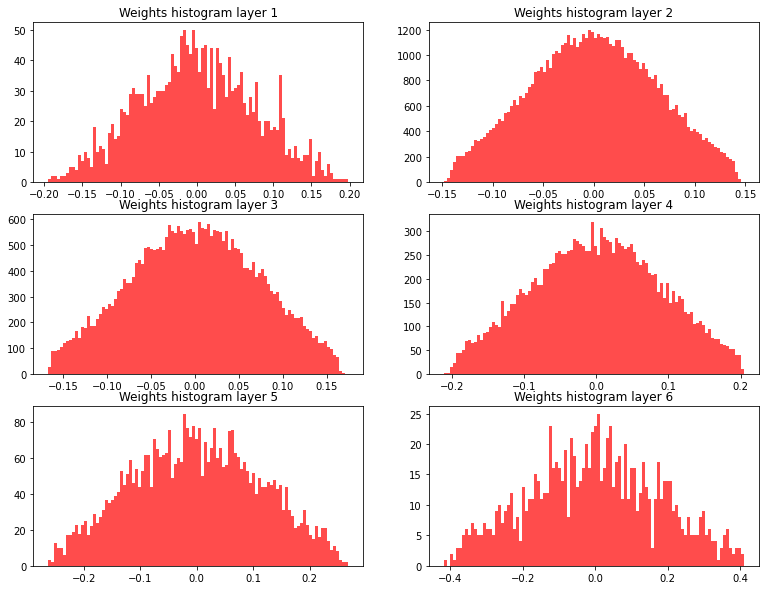

In [ ]:
plotweights(ANNGlorotNormal)

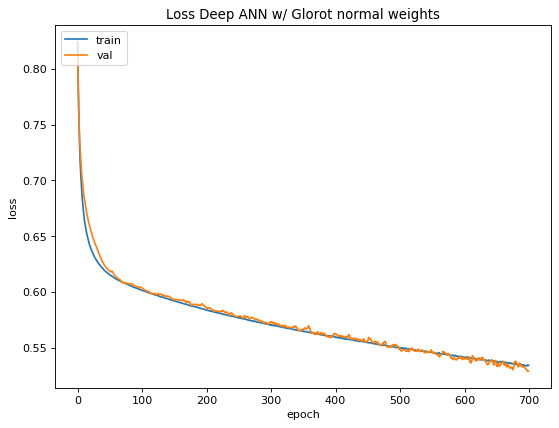

In [ ]:
historyplot(history,"Loss Deep ANN w/ Glorot normal weights")

In [ ]:
initial_lr = 0.2
ANNGlorotNormal2 = weightANN("GlorotNormal")

In [ ]:
history = ANNGlorotNormal2.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)

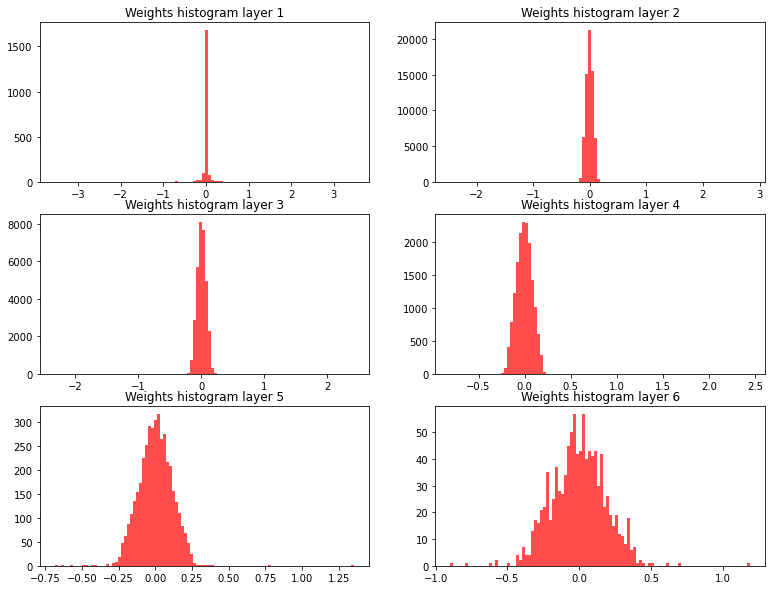

In [ ]:
plotweights(ANNGlorotNormal2)

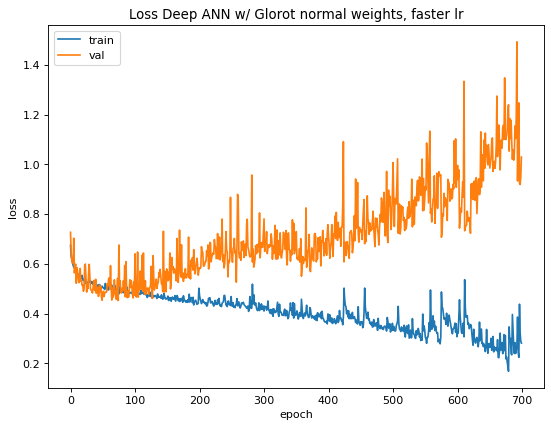

In [ ]:
historyplot(history,"Loss Deep ANN w/ Glorot normal weights, faster lr")

## 1.k Batch Normalization

Una manera propuesta de mejorar los desempeños de las redes es Batch Normalization. Entrene nuevamente su red preferida de la pregunta anterior, agregando capas de _Batch Normalization_ antes de cada función de activación. Comente sus resultados. Luego pruebe agregando capas de _Batch Normalization_ después de cada función de activación.

¿Qué realiza _Batch Normalization_ en términos matemáticos?. En términos de aprendizaje, ¿Qué evita la utilización de _Batch Normalization_?

¿Mejoran los desempeños de la red agregando _Batch Normalization_?¿Existe diferencias entre una capa de _Batch Normalization_ justo antes o justo después de la función de activación en términos de aprendizaje? Discuta.

In [43]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.metrics import BinaryAccuracy
from keras.activations import tanh,relu
from keras.regularizers import l1
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam, Adadelta
import numpy as np

In [29]:
initial_lr = 0.002
activation = 'tanh'
epochs=700
hidden_act_reg = l1(0.001)
out_act_reg = l1(0.001)
kernel_i="GlorotNormal"

In [54]:


def bestANN_before(kernel_i="GlorotNormal"):
    ANN = Sequential()
    ANN.add(Input(shape=(8,)))
    ANN.add(BatchNormalization(axis=1))
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))    
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))    
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))    
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))              
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))              
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))              
    ANN.add(Dense(1, activation = "sigmoid", activity_regularizer=out_act_reg))
    ANN.compile(
            optimizer=SGD(initial_lr), 
            loss='binary_crossentropy',metrics=[BinaryAccuracy()]
            )
    return ANN

def bestANN_After(kernel_i="GlorotNormal"):
    ANN = Sequential()
    ANN.add(Input(shape=(8,)))
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))    
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))              
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))              
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))              
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))              
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(BatchNormalization(axis=1))              
    ANN.add(Dense(1, activation = "sigmoid", activity_regularizer=out_act_reg))
    ANN.compile(
            optimizer=SGD(initial_lr), 
            loss='binary_crossentropy',metrics=[BinaryAccuracy()]
            )
    return ANN

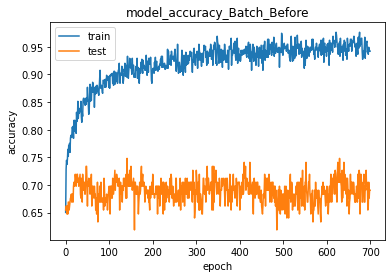

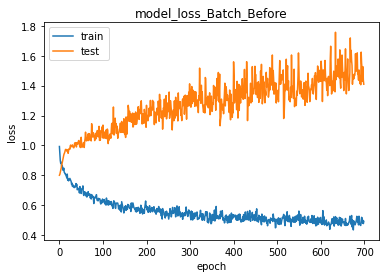

In [55]:
ANN = bestANN_before()
history_before = ANN.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)

plt.plot(history_before.history['binary_accuracy'])
plt.plot(history_before.history['val_binary_accuracy'])
plt.title('model_accuracy_Batch_Before')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_before.history['loss'])
plt.plot(history_before.history['val_loss'])
plt.title('model_loss_Batch_Before')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

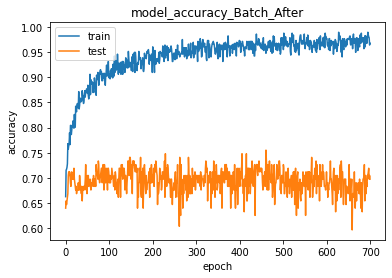

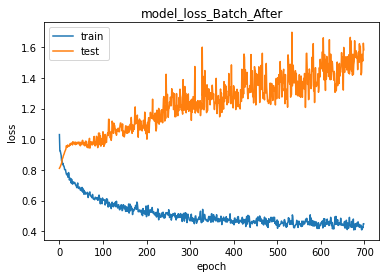

In [56]:
ANN = bestANN_After()
history_after = ANN.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)

plt.plot(history_after.history['binary_accuracy'])
plt.plot(history_after.history['val_binary_accuracy'])
plt.title('model_accuracy_Batch_After')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_after.history['loss'])
plt.plot(history_after.history['val_loss'])
plt.title('model_loss_Batch_After')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 1.l Otros Optimizadores

Utilizando la arquitectura de red que mejor se haya desempeñado a lo largo de la tarea, entrene esta red utilizando un optimizador distinto al gradiente descendente estocástico. Pruebe al menos 2 optimizadores implementados en keras (puede utilizar Adam, AdaGrad, AdaDelta, RMSprop, entre otros), también puede probar modificando los parámetros que no hemos utilizado del gradiente descendente estocástico (momentum, momentum de Nesterov...).

Note que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuestión, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. Para fijar los parámeros de los optimizadores debe importarlos desde `keras.optimizers` y pasar el objeto con los parámetros deseados al método `.compile` de su modelo. En cambio si con los valores usuales basta, algunos optimizadores pueden pasarse como `string` a `.compile`.

Compare como se desempeñan estos optimizadores con la versión utilizada anteriormente, considerando los tiempos de entrenamiento y el desempeño final alcanzado. Apoyese de gráficos. 

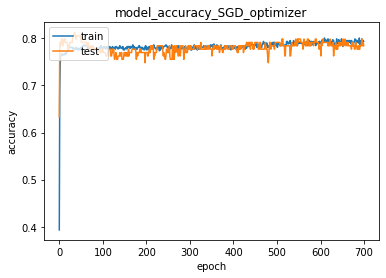

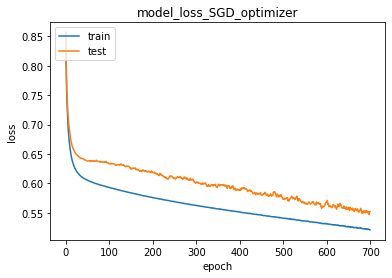

In [30]:
def bestANN(kernel_i="GlorotNormal"):
    ANN = Sequential()
    ANN.add(Input(shape=(8,)))
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))  
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))             
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))   
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))      
    ANN.add(Dense(1, activation = "sigmoid", activity_regularizer=out_act_reg))
    ANN.compile(
         optimizer=SGD(initial_lr), 
         loss='binary_crossentropy',metrics=[BinaryAccuracy()]
         )   
    return ANN

ANN = bestANN()
history = ANN.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model_accuracy_SGD_optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss_SGD_optimizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

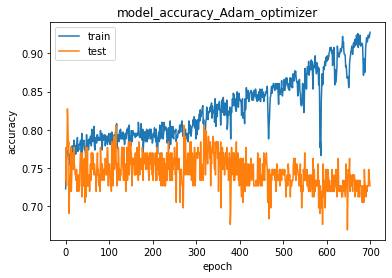

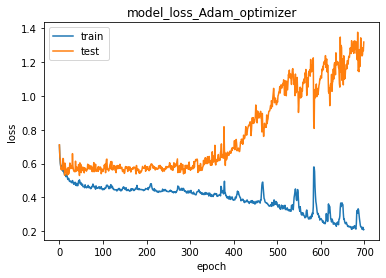

In [31]:
def bestANN(kernel_i="GlorotNormal"):
    ANN = Sequential()
    ANN.add(Input(shape=(8,)))
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))  
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))             
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))   
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))      
    ANN.add(Dense(1, activation = "sigmoid", activity_regularizer=out_act_reg))
    ANN.compile(
         optimizer=Adam(initial_lr), 
         loss='binary_crossentropy',metrics=[BinaryAccuracy()]
         )   
    return ANN

ANN = bestANN()
history = ANN.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model_accuracy_Adam_optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss_Adam_optimizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

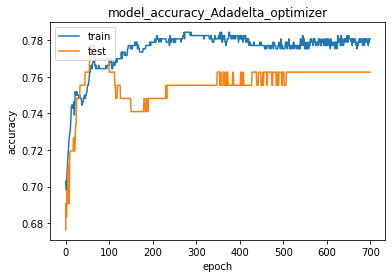

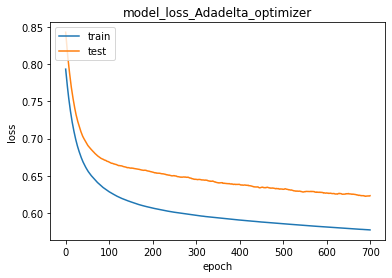

In [35]:
from keras.optimizers import Adadelta, ftrl


def bestANN(kernel_i="GlorotNormal"):
    ANN = Sequential()
    ANN.add(Input(shape=(8,)))
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))  
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))             
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))   
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))      
    ANN.add(Dense(1, activation = "sigmoid", activity_regularizer=out_act_reg))
    ANN.compile(
         optimizer=Adadelta(initial_lr), 
         loss='binary_crossentropy',metrics=[BinaryAccuracy()]
         )   
    return ANN

ANN = bestANN()
history = ANN.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model_accuracy_Adadelta_optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss_Adadelta_optimizer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 1.m Testing 

Finalmente, luego de entrenar todos estos modelos estamos en condiciones de probar que tan bien fue nuestro desempeño. Para esto utilice el modelo en el cual obtuvo el mejor desempeño en validación y calcule el error de la predicción realizada sobre el _Test set_. Puede utilizar el metodo `.predict` de su modelo. 

¿Qué tan bien se desempeñaría su modelo en un caso real en vista de lo anterior? 

In [37]:
def bestANN(kernel_i="GlorotNormal"):
    ANN = Sequential()
    ANN.add(Input(shape=(8,)))
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))  
    ANN.add(Dense(256, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))
    ANN.add(Dense(128, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))             
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))   
    ANN.add(Dense(32, activation=activation, activity_regularizer=hidden_act_reg, 
                  kernel_initializer=kernel_i, bias_initializer='zeros'))      
    ANN.add(Dense(1, activation = "sigmoid", activity_regularizer=out_act_reg))
    ANN.compile(
         optimizer=SGD(initial_lr), 
         loss='binary_crossentropy',metrics=[BinaryAccuracy()]
         )   
    return ANN

ANN = bestANN()
ANN.fit(x_tr_1, y_tr, epochs=epochs, validation_data=(x_val_1,y_val),verbose=0)
predictions = ANN.predict(X_test)



3/3 [==============================] - 0s 3ms/step


In [55]:
scaler_x1 = StandardScaler()
scaler_x1.fit(X1)
x_tr_1 = scaler_x1.transform(X1)
X_test_1 = scaler_x1.transform(X_test)

predictions = ANN.predict(X_test_1)
class_predic = np.where(predictions > 0.5, 1,0)


3/3 [==============================] - 0s 3ms/step


In [47]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Confusion matrix, without normalization
[[41  6]
 [17 13]]


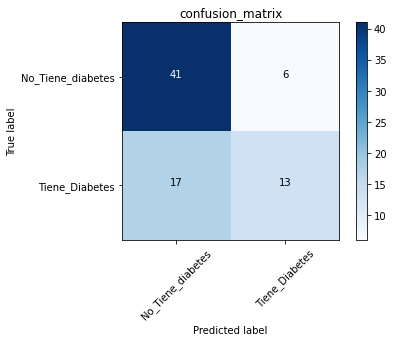

In [56]:

cm = confusion_matrix(y_true=y_test, y_pred=class_predic)

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
cm_plot_labels = ['No_Tiene_diabetes','Tiene_Diabetes']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')